# 2. Sumarização

## 2.1. Sumarizando avaliações de um hotel

In [1]:
%load_ext autoreload

%autoreload 2

In [ ]:
from llms.rag import load_data
df = load_data()

Loading data...
(222923, 22)
(222923, 22)
load_data took: 0.587890625


In [5]:
from llms.summary import prep_data

hotel_counts = prep_data(df)

Text(0.5, 1.0, 'Quantidade de hotéis com mais de 1000 avaliações')

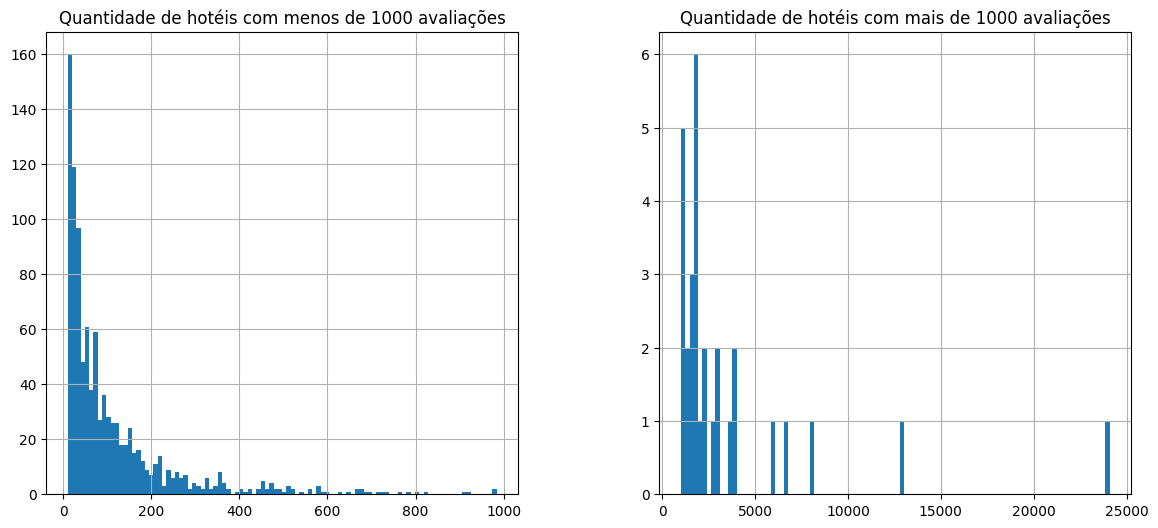

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hotel_counts[~hotel_counts.big].hist(bins=100, ax=axes[0])
hotel_counts[hotel_counts.big].hist(bins=100, ax=axes[1])
axes[0].set_title("Quantidade de hotéis com menos de 1000 avaliações")
axes[1].set_title("Quantidade de hotéis com mais de 1000 avaliações")

In [7]:
from llms.rag import load_rag

vector_store, rag_alias, embeddings_name = load_rag("google-ip")

load_rag...
load_embedding...
model_alias='google-4' model_data=('google', 'models/text-embedding-004') task_type='retrieval_query'
Loading GoogleGenerativeAIEmbeddings model...
embeddings=GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001E35460E610>, model='models/text-embedding-004', task_type='retrieval_query', google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None)
rag_alias='google-ip' embedding_model_alias='google-4' embeddings_name='models/text-embedding-004' path_index='data/faiss_index_google_v4_ip'
Loading index...


  4%|▍         | 1/23 [00:00<00:02,  8.71it/s]

i=0 vector_store.index.ntotal=10000


 13%|█▎        | 3/23 [00:00<00:03,  5.12it/s]

i=1 vector_store.index.ntotal=20000
i=2 vector_store.index.ntotal=30000


 17%|█▋        | 4/23 [00:00<00:03,  5.77it/s]

i=3 vector_store.index.ntotal=40000


 22%|██▏       | 5/23 [00:01<00:04,  4.27it/s]

i=4 vector_store.index.ntotal=50000
i=5 vector_store.index.ntotal=60000


 39%|███▉      | 9/23 [00:01<00:01,  7.27it/s]

i=6 vector_store.index.ntotal=70000
i=7 vector_store.index.ntotal=72923
i=8 vector_store.index.ntotal=82923


 48%|████▊     | 11/23 [00:02<00:02,  5.35it/s]

i=9 vector_store.index.ntotal=92923
i=10 vector_store.index.ntotal=102923


 57%|█████▋    | 13/23 [00:02<00:01,  6.60it/s]

i=11 vector_store.index.ntotal=112923
i=12 vector_store.index.ntotal=122923


 61%|██████    | 14/23 [00:02<00:01,  7.17it/s]

i=13 vector_store.index.ntotal=132923


 65%|██████▌   | 15/23 [00:02<00:01,  4.61it/s]

i=14 vector_store.index.ntotal=142923


 74%|███████▍  | 17/23 [00:03<00:01,  5.21it/s]

i=15 vector_store.index.ntotal=152923
i=16 vector_store.index.ntotal=162923


 83%|████████▎ | 19/23 [00:03<00:00,  6.38it/s]

i=17 vector_store.index.ntotal=172923
i=18 vector_store.index.ntotal=182923


 87%|████████▋ | 20/23 [00:03<00:00,  6.55it/s]

i=19 vector_store.index.ntotal=192923


 96%|█████████▌| 22/23 [00:04<00:00,  4.81it/s]

i=20 vector_store.index.ntotal=202923
i=21 vector_store.index.ntotal=212923


100%|██████████| 23/23 [00:04<00:00,  5.47it/s]

i=22 vector_store.index.ntotal=222923
Index loaded.
load_index took: 4.2077953815460205


In [50]:
from llms.models import load_model

llm, model_name, max_new_tokens = load_model("gemini-2.0-flash")

load_model...
model_alias='gemini-2.0-flash' max_new_tokens=3000 model_data=('google', 'gemini-2.0-flash')
Loading ChatGoogleGenerativeAI model...
llm=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), temperature=0.0, max_output_tokens=3000, max_retries=5, timeout=10.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001E39B649ED0>, default_metadata=())
hf_pipe=<llms.models.GenericHuggingFacePipeline object at 0x000001E375A06F50>


In [77]:
from pathlib import Path
import os

summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)

files = os.listdir(summaries_folder)
hotels_done = [f.replace(".pq","") for f in files]
hotel_counts_sample = hotel_counts[~hotel_counts.nome.isin(hotels_done)].iloc[0:1].copy()
hotel_counts_sample = hotel_counts_sample.reset_index(drop=True)
hotel_counts_sample

,nome,count_,big
0,Costao do Santinho Resort,8160,True


In [78]:
hotel_counts_sample = hotel_counts[2:3].copy().reset_index(drop=True)
hotel_counts_sample

,nome,count_,big
0,Costao do Santinho Resort,8160,True


In [ ]:
from llms.run_summary import run_make_summaries

results_summaries = run_make_summaries(
    df=df,
    hotel_counts=hotel_counts_sample,
    vector_store=vector_store,
    rag_alias=rag_alias,
    llm=llm,
    model_name=model_name,
    max_new_tokens=max_new_tokens,
)

run_make_summaries...


  0%|          | 0/1 [00:00<?, ?it/s]


i=0 hotel_name='Sol Grand Premium - All Inclusive' count_=12788 n_responses_full=1000 n_responses_topic=100
make_docs...
len(docs)=1000
query_model...
len(prompt)=346524
num_input_tokens=52203
len(response)=3547
response='## Resumo do Hotel Sol Grand Premium - All Inclusive\n\n**1. Infraestrutura e Acomodações:**\n\nOs hóspedes geralmente elogiam o tamanho e o conforto dos quartos, com camas confortáveis e ar condicionado eficiente. A decoração é frequentemente descrita como bonita e moderna, especialmente nos quartos reformados. No entanto, algumas avaliações mencionam quartos mais antigos com cheiro de mofo, mobiliário ultrapassado e problemas de manutenção, como vazamentos e chuveiros com pouca água quente. A limpeza é geralmente considerada boa, mas alguns hóspedes relatam problemas com poeira e falta de troca de lençóis. As piscinas são bem cuidadas e limpas, com espreguiçadeiras confortáveis, mas alguns mencionam a falta de escorregadores na piscina infantil e a necessidade de m

100%|██████████| 1/1 [01:05<00:00, 65.17s/it]

len(response)=3491
response='Aqui está um resumo do hotel "Sol Grand Premium - All Inclusive" com base nos tópicos solicitados:\n\n**1. Infraestrutura e Acomodações:**\n\n*   **Positivo:** Quartos amplos e confortáveis, especialmente os executivos com vista para o mar, camas confortáveis e boa limpeza. Oferece diversas opções de lazer, como piscinas, atividades para adultos e crianças, e acesso à praia com estrutura de apoio.\n*   **Negativo:** Estrutura envelhecida com necessidade de manutenção, incluindo ferrugem, infiltrações e elevadores quebrados. Alguns quartos são simples, com pouca proteção para crianças nas sacadas, ventilação inadequada e problemas como mofo, ar condicionado ineficiente e mobília antiga.\n\n**2. Atendimento e Serviço:**\n\n*   **Positivo:** Muitos hóspedes elogiam a cordialidade, atenção e eficiência dos funcionários em diversos setores, com vários nomes sendo mencionados pelo excelente serviço. A equipe de animação é elogiada pela energia e capacidade de ent

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results_summaries)
hotel_counts_sample[list(results_summaries[0])] = df_results

In [ ]:
hotel_counts_sample

,nome,count_,big,model_name,max_new_tokens,rag_alias,prompt,response,prompt_v2,response_v2,...,prompt_final,response_final,context,context_v2,contexts,context_final,info,info_v2,infos,info_final
0,Sol Grand Premium - All Inclusive,12788,True,gemini-2.0-flash,3000,google-ip,\nVocê é um assistente de sumarização de hotéi...,## Resumo do Hotel Sol Grand Premium - All Inc...,\nVocê é um assistente de sumarização de hotéi...,Aqui está um resumo do hotel Sol Grand Premium...,...,\nVocê é um assistente de sumarização de hotéi...,"Aqui está um resumo do hotel ""Sol Grand Premiu...",Informações gerais sobre o hotel:Hotel: Sol Gr...,Informações gerais sobre o hotel:Hotel: Sol Gr...,[Informações gerais sobre o hotel:Hotel: Sol G...,"A seguir, uma lista de resumos do hotel ""Sol G...","{'input_tokens': 96464, 'output_tokens': 735, ...","{'input_tokens': 93083, 'output_tokens': 599, ...","[{'input_tokens': 14745, 'output_tokens': 472,...","{'input_tokens': 5572, 'output_tokens': 801, '..."


In [ ]:
from llms.run_summary import run_eval_summaries

results_scores = run_eval_summaries(
    hotel_counts=hotel_counts_sample,
    llm=llm,
    model_name=model_name,
    max_new_tokens=max_new_tokens,
)

run_eval_summaries...


  0%|          | 0/1 [00:00<?, ?it/s]


i=0 hotel_name='Sol Grand Premium - All Inclusive'
g_eval_scores...
Evaluating summary 0
metric_name='Relevância'
query_model...
len(prompt)=350121
num_input_tokens=52736
len(response)=1
response='4'
info={'input_tokens': 97222, 'output_tokens': 2, 'total_tokens': 97224, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 2 seconds...
metric_name='Coerência'
query_model...
len(prompt)=350304
num_input_tokens=52783
len(response)=14
response='- Coerência: 4'
info={'input_tokens': 97281, 'output_tokens': 8, 'total_tokens': 97289, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 2 seconds...
metric_name='Consistência'
query_model...
len(prompt)=350137
num_input_tokens=52733
len(response)=1
response='4'
info={'input_tokens': 97216, 'output_tokens': 2, 'total_tokens': 97218, 

100%|██████████| 1/1 [00:42<00:00, 42.12s/it]

score_final=4.5 scores=[5, 5, 5, 3]


In [ ]:
import pandas as pd

df_scores = pd.DataFrame(results_scores)
hotel_counts_sample[list(results_scores[0])] = df_scores
hotel_counts_sample

,nome,count_,big,model_name,max_new_tokens,rag_alias,prompt,response,prompt_v2,response_v2,...,infos,info_final,eval_model_name,eval_max_new_tokens,scores,scores_mean,scores_v2,scores_mean_v2,scores_final,scores_mean_final
0,Sol Grand Premium - All Inclusive,12788,True,gemini-2.0-flash,3000,google-ip,\nVocê é um assistente de sumarização de hotéi...,## Resumo do Hotel Sol Grand Premium - All Inc...,\nVocê é um assistente de sumarização de hotéi...,Aqui está um resumo do hotel Sol Grand Premium...,...,"[{'input_tokens': 14745, 'output_tokens': 472,...","{'input_tokens': 5572, 'output_tokens': 801, '...",gemini-2.0-flash,3000,"[{'index': 0, 'summary': '## Resumo do Hotel S...",3.75,"[{'index': 0, 'summary': 'Aqui está um resumo ...",4.5,"[{'index': 0, 'summary': 'Aqui está um resumo ...",4.5


In [79]:
print(
    hotel_counts_sample.iloc[0],
)

nome      Costao do Santinho Resort
count_                         8160
big                            True
Name: 0, dtype: object


In [ ]:
hotel = hotel_counts_sample.iloc[0].nome
hotel

'Sol Grand Premium - All Inclusive'

In [ ]:
from pathlib import Path
summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)
out_path = summaries_folder / f"{hotel}.pq"
hotel_counts_sample.to_parquet(out_path)
out_path

WindowsPath('data/hotel_summaries/Sol Grand Premium - All Inclusive.pq')

## 2.2. Resultados

In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
import pandas as pd

df_prep = pd.read_parquet("data/df_prep_2025-03-09_consolidado.pq")

In [ ]:
df_group = df_prep.groupby("place_name").agg(
    avaliacoes=("done","count"),
    avaliacoes_texto=("text","count"),
).reset_index()
df_group

In [ ]:
print(f"Número de avaliações raspadas: {df_prep.shape[0]}")
print(f'Número de avaliações com texto: {df_prep.query("text_n_words>0").shape[0]}')
print(f'Número de avaliações com >= 10 palavras: {df_prep.query("text_n_words>=10").shape[0]}')

Número de avaliações raspadas: 791313
Número de avaliações com texto: 461275
Número de avaliações com > 10 palavras: 222923


In [27]:
print(f"Número de hotéis raspados: {df_group.place_name.nunique()}")
print(f'Número de hotéis com >= 10 avaliações: {df_group.query("avaliacoes>=10").shape[0]}')
print(f'Número de hotéis com >= 100 avaliações: {df_group.query("avaliacoes>=100").shape[0]}')
print(f'Número de hotéis com >= 1000 avaliações: {df_group.query("avaliacoes>=1000").shape[0]}')

Número de hotéis raspados: 1129
Número de hotéis com >= 10 avaliações: 1119
Número de hotéis com >= 100 avaliações: 803
Número de hotéis com >= 1000 avaliações: 142


In [29]:
print(f'Número de hotéis com >= 10 avaliações com texto: {df_group.query("avaliacoes_texto>=10").shape[0]}')
print(f'Número de hotéis com >= 100 avaliações com texto: {df_group.query("avaliacoes_texto>=100").shape[0]}')
print(f'Número de hotéis com >= 1000 avaliações com texto: {df_group.query("avaliacoes_texto>=1000").shape[0]}')

Número de hotéis com >= 10 avaliações com texto: 1101
Número de hotéis com >= 100 avaliações com texto: 643
Número de hotéis com >= 1000 avaliações com texto: 69


In [30]:
from llms.rag import load_data
df = load_data()

Loading data...
(222923, 22)
(222923, 22)
load_data took: 0.4837372303009033


In [31]:
from llms.summary import prep_data

hotel_counts = prep_data(df)

Text(0.5, 1.0, 'Quantidade de hotéis com mais de 1000 avaliações')

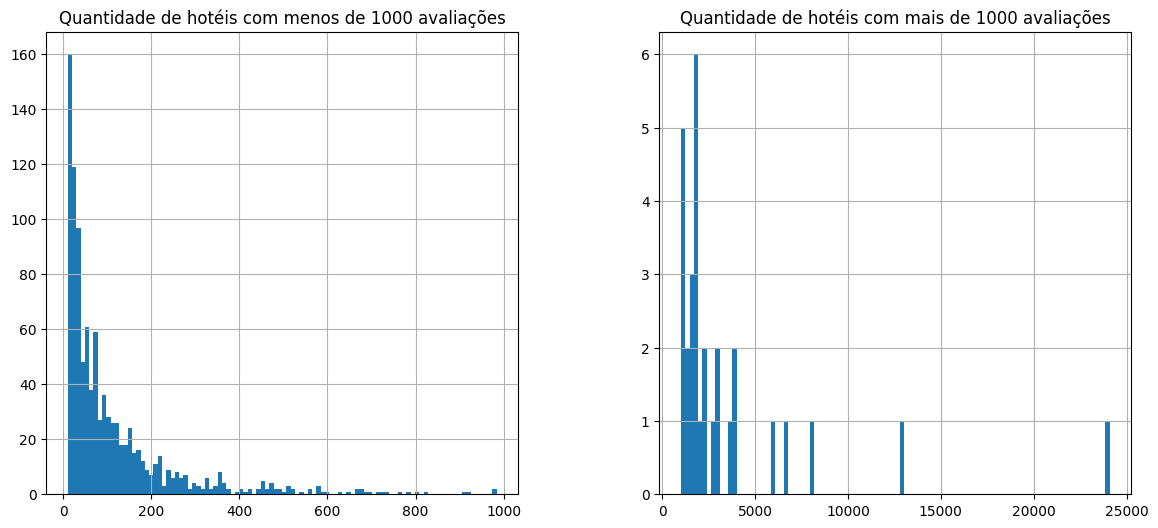

In [32]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hotel_counts[~hotel_counts.big].hist(bins=100, ax=axes[0])
hotel_counts[hotel_counts.big].hist(bins=100, ax=axes[1])
axes[0].set_title("Quantidade de hotéis com menos de 1000 avaliações")
axes[1].set_title("Quantidade de hotéis com mais de 1000 avaliações")

In [64]:
from pathlib import Path
import os

summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)

files = os.listdir(summaries_folder)
len(files)

103

In [65]:
import pandas as pd

hotels = []
for file in files:
    dfi = pd.read_parquet(summaries_folder / file)
    hotels.append(dfi)
df_results = pd.concat(hotels).reset_index(drop=True)

In [66]:
df_results.filter(regex="scores_mean").mean()

scores_mean          4.027228
scores_mean_v2       4.094059
scores_mean_final    4.158416
dtype: float64

In [39]:
df_results = df_results.sort_values("count_", ascending=False).reset_index(drop=True)

In [40]:
df_results[["nome","response_final"]]

for i, hotel in df_results.iloc[:2].iterrows():
    print("="*100)
    print(f"RESUMO DO HOTEL: {hotel.nome}\n{hotel.response_final}\n")

RESUMO DO HOTEL: Grand Palladium Imbassaí Resort & Spa
**Grand Palladium Imbassaí Resort & Spa: Resumo Detalhado por Tópicos**

1.  **Infraestrutura e Acomodações:** O hotel oferece uma infraestrutura geralmente elogiada, com quartos espaçosos, confortáveis e bem equipados, além de instalações de lazer como piscinas amplas e diversas opções de esportes. A limpeza é frequentemente destacada como um ponto forte. No entanto, alguns hóspedes relatam problemas com a manutenção dos quartos, incluindo ar-condicionado ineficiente, limpeza inadequada, falta de reposição de itens e até mesmo goteiras. A superlotação da piscina principal e a distância da praia, com transporte precário, também são pontos negativos.

2.  **Atendimento e Serviço:** Muitos hóspedes elogiam a cordialidade e presteza dos funcionários em diversos setores, mencionando nomes específicos como exemplos de excelência. A limpeza e organização também são pontos fortes, assim como a eficiência no serviço de quarto. Por outro la

In [45]:
# Abordagem de Resumo 1 
print(df_results.iloc[-1].prompt)


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
Informações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.
Região:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra
Tipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056

Top 369 avaliações do hotel mais semelhantes à pergunta:
 - Avaliação 1
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:5; Nota Localização:5; Nota Serviço:5
Avaliação: O hotel está em excelente localização. Fui para almoçar no restaurante deles. Comida fresquinha e maravilhosa. Bom tempero e sabor. Inúmeras opções de saladas, carnes e sobremesas. Um local aconchegante. Tem também opções de sucos e refrigerantes.

 - Avaliação 2
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:4; Nota Localização:5; Nota Serviço:4
Avaliação: Hotel acolhedor co

In [46]:
# Abordagem de Resumo 2
print(df_results.iloc[-1].prompt_v2)


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
Informações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.
Região:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra
Tipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056

Top 369 avaliações do hotel mais semelhantes à pergunta:
 - Avaliação 1, Similaridade: 0.493
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:4; Nota Localização:5; Nota Serviço:5
Avaliação: Poderia ter uma prateleira na parede para colocar as malas,para não ter que deixar no chão.!!

 - Avaliação 2, Similaridade: 0.530
Nota:5; Curtidas:0; Usuário é guia local
Avaliação: Frequento apenas nos almoços, simplesmente delicioso, possui uma variedade no qual todos aproveitam. Uma dica é experimentar a maionese com batatas  excepcional. Valores para almoço 

In [50]:
# Abordagem de Resumo 3
display(df_results.iloc[-1].prompts)
print(df_results.iloc[-1].prompt_final)

array(['\nVocê é um assistente de sumarização de hotéis em português.\nUtilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.\nSiga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.\n\nCONTEXTO:\nInformações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.\nRegião:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra\nTipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056\n\nTop 100 avaliações do hotel mais semelhantes à pergunta:\n - Avaliação 1, Similaridade: 0.640\nNota:5; Curtidas:1; Usuário é guia local\nAvaliação: Ótima experiência, excelente atendimento, limpeza impecável. Amei estar em um ambiente super acolhedor com pessoas que te tratam como amigos.\n\n - Avaliação 2, Similaridade: 0.640\nNota:3; Curtidas:0; Usuário é guia local\nAvaliação: Atendimento muito bom quarto bem limpos localização muito boa e orevo acessível ,comida boa café da manhã muito bom.Foi a primeira vez em Serra Negra e semore qu


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
A seguir, uma lista de resumos do hotel "Hotel Vitória Marchi" por tópico e aspecto:Aspectos positivos do hotel no quesito "Infraestrutura e Acomodações – Conforto, limpeza, tecnologia, lazer, estacionamento.":
O Hotel Vitória Marchi em Serra Negra é frequentemente elogiado por sua limpeza impecável e ambiente acolhedor. Os quartos são considerados confortáveis, embora alguns hóspedes mencionem que as camas poderiam ser melhores e alguns quartos são pequenos. O hotel oferece apartamentos separados para famílias ou grupos maiores.

No quesito lazer, o hotel possui piscina aquecida.

Apesar de sua localização central e conveniente, o hotel não possui estacionamento próprio, o que pode ser um inconveniente para alguns hóspedes, sendo necessá

In [63]:
# Avaliação de Abordagem de Resumo 1 
print(df_results.iloc[-1].scores)
for score in df_results.iloc[-1].scores:
    print(score["score"])
print(df_results.iloc[-1].scores[0]["prompt"])

[{'index': 0, 'info': {'finish_reason': 'STOP', 'input_token_details': {'cache_read': 0}, 'input_tokens': 30068, 'output_tokens': 8, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': array([], dtype=object)}, 'safety_ratings': array([], dtype=object), 'total_tokens': 30076}, 'metric_name': 'Relevância', 'prompt': '\nVocê receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  \nCertifique-se de ler e entender essas instruções com muito cuidado.  \nMantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  \n\n**Critério de Avaliação:**  \n\n\nRelevância (1-5) - seleção do conteúdo importante do texto original.  \nO resumo deve incluir apenas informações essenciais do documento-fonte.  \nOs avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  \n  \n\n**Etapas de Avaliação:**  \n\n \n1. Leia atentamente o resumo e o documento-fonte.  \n2. Compare o resumo com o docume